<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризації банківських рахунків. [Опис даних](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних
* Проведіть кластеризацію за допомогою DBSCAN


In [35]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/CC%20GENERAL.csv')

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [36]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

data = scaler.fit_transform(df_numeric)

In [37]:
type(data)

pandas.core.frame.DataFrame

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

data_imputed = imputer.fit_transform(data)

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(data_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [40]:
kmeans.inertia_

2927.6030875728375

In [41]:
import matplotlib.pyplot as plt

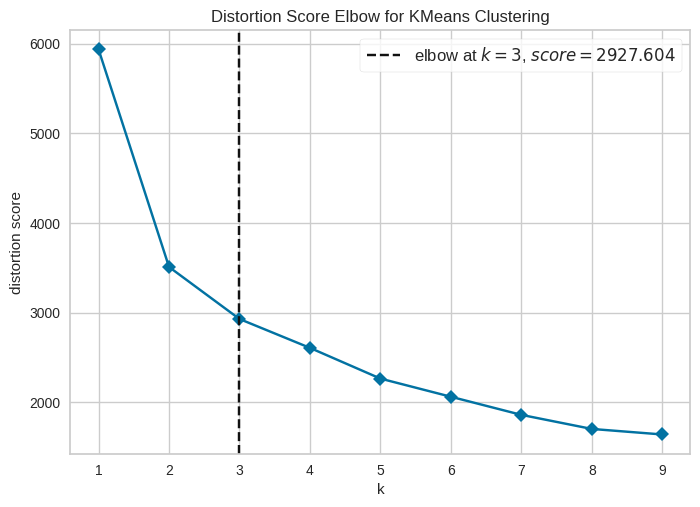

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 10),
                              timings=False,
                              metric='distortion',
                              distance_metric='euclidean'
                              )

visualizer.fit(data_imputed)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


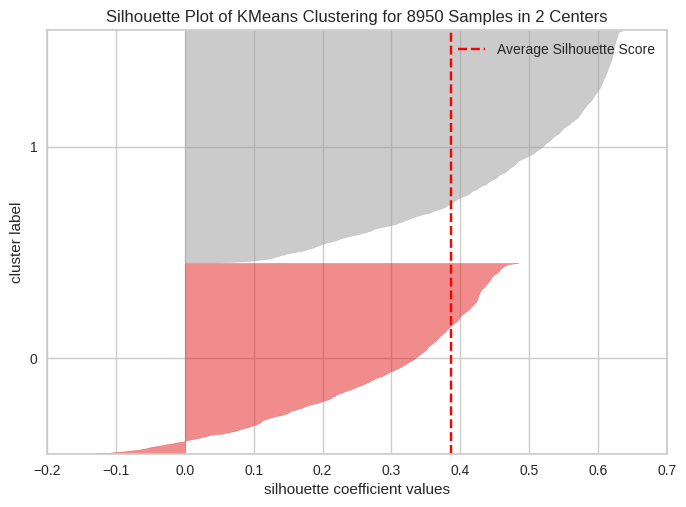

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(2))
visualizer.fit(data_imputed)
visualizer.show()

In [44]:
kmeans = KMeans(2)

kmeans.fit(data_imputed)

df['cluster_id'] = kmeans.labels_

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [45]:
df['cluster_id'].value_counts()

,count
cluster_id,
0,4914
1,4036


In [46]:
numeric_columns = df.select_dtypes(include=['number'])

results = numeric_columns.groupby(by=df['cluster_id']).mean()

results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
cluster_id,,,,,,,,,,,,,,,,,,
0,1694.865025,0.828452,323.099733,257.384786,65.951689,1317.124216,0.159790,0.092652,0.065786,0.182307,4.311559,3.121083,4131.367368,1463.915522,846.730748,0.071056,11.449125,0.0
1,1405.719271,0.936710,1831.261440,1000.378005,831.260857,567.033711,0.892822,0.336151,0.728058,0.077721,1.954906,28.819623,4936.427218,2060.940684,884.875412,0.254355,11.600347,1.0


<Axes: xlabel='cluster_id'>

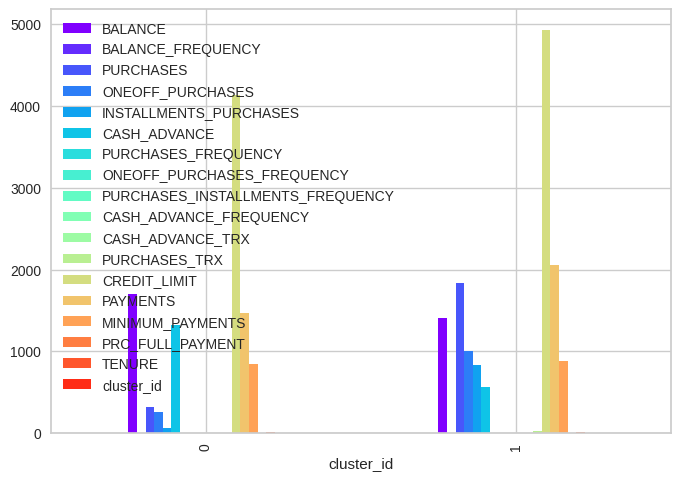

In [47]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)

In [48]:
!pip install -q kneed

0.21891129356477598


<Figure size 500x500 with 0 Axes>

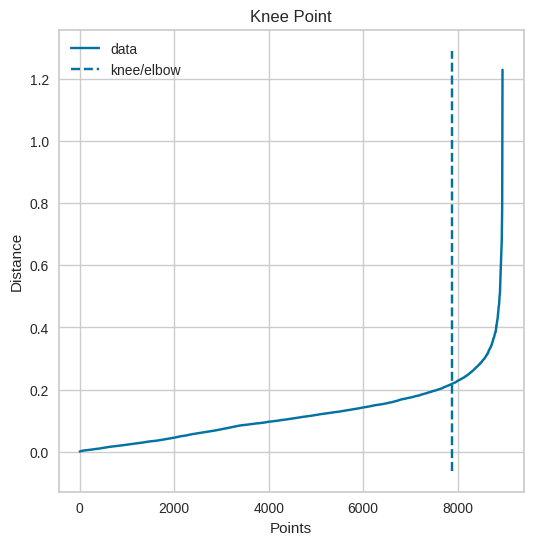

In [49]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(data_imputed)
distances, indices = neighbors.kneighbors(data_imputed)
distances = np.sort(distances, axis=0)
distances = distances[:,-1]

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


print(distances[knee.knee])

In [50]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=3)

dbscan.fit(data_imputed)

DBSCAN(eps=1, min_samples=3)

In [51]:
df['cluster_id'] = dbscan.labels_

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [52]:
df['cluster_id'].value_counts()

,count
cluster_id,
0,8949
-1,1


In [53]:
numeric_df = df.select_dtypes(include=['number'])

results = numeric_df.groupby(by=df['cluster_id']).mean()

results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
cluster_id,,,,,,,,,,,,,,,,,,
-1,10905.053810,1.000000,431.93000,133.500000,298.430000,47137.21176,0.583333,0.250000,0.500000,1.000000,123.000000,21.00000,19600.000000,39048.597620,5394.173671,0.000000,12.000000,-1.0
0,1563.431071,0.877257,1003.26867,592.488655,411.080231,973.71318,0.490340,0.202452,0.364422,0.135048,3.235445,14.70913,4492.761302,1728.974062,863.681998,0.153732,11.517264,0.0


<Axes: xlabel='cluster_id'>

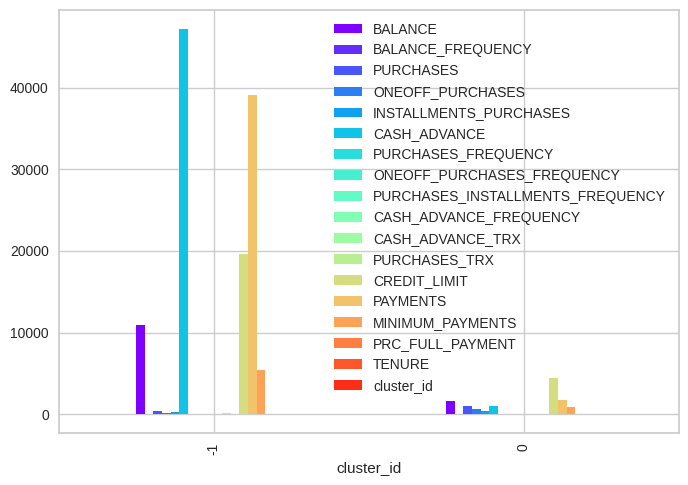

In [54]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)